In [ ]:
#| export
from paint_hydro.paint import *
from paint_hydro.load import *
from paint_hydro.metal import *

In [ ]:
#| hide
import matplotlib.pylab as plt
import numpy as np

# Paint-Hydro

> Adding spectral energy distributions to HACC hydro simulations

HACC hydro simulations provide start formation histories throughout the simulations.
One can also extract metallicity (or metallicity histories). These can be used with Fast Spectral synthesis models (FSPS) to obtain SEDs (narrow-band or photometric colors)

## Install

```sh
pip install paint_hydro
```

## How to use 

Loading the star formation histories and time steps

Text(0, 0.5, 'SFR')

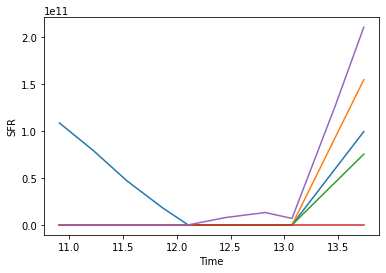

In [ ]:
# | export
dirIn = '/lcrc/project/cosmo_ai/nramachandra/Projects/Hydro_paint/Data/SFHs/'

plt.figure(32)

for galID in range(9, 14):
    fileIn = dirIn + 'gal' + str(galID) +'.txt'
    hydro_sm, hydro_tt = load_sfh(fileIn)
    plt.plot(hydro_tt, np.gradient(hydro_sm, hydro_tt))

plt.xlabel('Time')
plt.ylabel('SFR')